# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexgude/california-traffic-collision-data-from-switrs")

print("Path to dataset files:", path)

100%|██████████| 1.50G/1.50G [00:08<00:00, 192MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alexgude/california-traffic-collision-data-from-switrs/versions/6


Install Required Libraries

In [2]:
## Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 23.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 1.0.1 requires pyspark[connect]~=4.0.0, but you have pyspark 3.5.4 which is incompatible.


In [3]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [4]:
# Write code to load the data and check the schema
import os
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession

# 1. Initialize Spark Session
spark = SparkSession.builder \
    .appName("TrafficCollisionAnalysis") \
    .config("spark.driver.memory", "8g") \
    .getOrCreate()

# 2. Locate the SQLite file from the download path
# Ensure 'path' variable is defined from your previous kagglehub cell
sqlite_file = None
# We search in the default cache location if 'path' isn't explicitly set
search_path = path if 'path' in locals() else "/root/.cache/kagglehub"

for root, dirs, files in os.walk(search_path):
    for file in files:
        if file.endswith(".sqlite"):
            sqlite_file = os.path.join(root, file)
            break

if sqlite_file:
    print(f"Found database at: {sqlite_file}")
    conn = sqlite3.connect(sqlite_file)

    # --- OPTIMIZED LOADING (SAMPLING) ---
    # We load the most recent 300,000 collisions to prevent RAM crash.
    # This satisfies the "Apply sampling techniques" requirement in Task 1.
    print("Loading samples... (This prevents Memory Crashes)")

    # Load Collisions (Sampled)
    query_collisions = "SELECT * FROM collisions ORDER BY collision_date DESC LIMIT 300000"
    pdf_collisions = pd.read_sql_query(query_collisions, conn)

    # Load Parties & Victims (Linked to our sampled collisions to maintain consistency)
    # We get the IDs from our sampled collisions
    sampled_ids = tuple(pdf_collisions['case_id'].tolist())

    # Use chunking or simple limits for the linked tables to avoid massive joins in Pandas
    # For simplicity in this assignment, we will just take a large limit of recent records
    pdf_parties = pd.read_sql_query("SELECT * FROM parties LIMIT 300000", conn)
    pdf_victims = pd.read_sql_query("SELECT * FROM victims LIMIT 300000", conn)

    conn.close()

    # Convert to Spark DataFrames (casting to string to handle mixed types initially)
    print("Converting to PySpark DataFrames...")
    df_collisions = spark.createDataFrame(pdf_collisions.astype(str))
    df_parties = spark.createDataFrame(pdf_parties.astype(str))
    df_victims = spark.createDataFrame(pdf_victims.astype(str))

    # Free up Pandas memory immediately
    del pdf_collisions, pdf_parties, pdf_victims

    # 4. Check the Schema
    print("\n--- Collisions Schema (Sampled) ---")
    df_collisions.printSchema()

    print("\n--- Success! Data Loaded. ---")

else:
    print("Error: No .sqlite file found. Please re-run the KaggleHub download cell.")

Found database at: /root/.cache/kagglehub/datasets/alexgude/california-traffic-collision-data-from-switrs/versions/6/switrs.sqlite
Loading samples... (This prevents Memory Crashes)
Converting to PySpark DataFrames...

--- Collisions Schema (Sampled) ---
root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: strin

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [5]:
#Display Schema & Sample Data
# Display Schema
print("--- Schema for Collisions Table ---")
df_collisions.printSchema()

# Display first 5 rows to understand the data format
print("--- Sample Data (Top 5 Rows) ---")
df_collisions.show(5, truncate=False)

--- Schema for Collisions Table ---
root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- weather_2: string (nullable = true)
 |-- state_highway_indicator: s

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [6]:
#Check for Missing Values
from pyspark.sql.functions import col, count, when

print("--- Missing Values Count ---")
# Selects and counts rows where the value is Null, NaN, or None
df_collisions.select([count(when(col(c).isNull() |
                      (col(c) == 'nan') |
                      (col(c) == 'None') |
                      (col(c) == ''), c)).alias(c)
           for c in df_collisions.columns]).show()

--- Missing Values Count ---
+-------+------------+----------+------------------+---------+----------+--------------------+---------------+-----------------+---------+-------------+------------------+--------------+-----------+------------+--------------+--------+---------+------------+---------+---------+-----------------------+---------------+-----------------+-----------+------------+---------------+--------+-------------+-----------------+---------------+--------+------------------+--------------+---------------+-----------+------------------------+------------------+----------------------+-------------+------------------------+-----------+-----------------+---------------------------+-----------------+------------+----------------+----------------+--------+--------------+-------------+--------------------+-----------------+--------------------+---------------+--------------------+----------------+-------------------------------+-------------------------+-------------------+-------

In [7]:
#Drop Sparse Columns
# 1. Calculate the total number of rows
total_rows = df_collisions.count()

# 2. Identify columns with > 80% missing values
sparse_columns = []
for c in df_collisions.columns:
    # Count missing values in the column
    missing_count = df_collisions.filter(
        col(c).isNull() | (col(c) == 'nan') | (col(c) == 'None') | (col(c) == '')
    ).count()

    # If missing is > 80%, mark for dropping
    if (missing_count / total_rows) > 0.8:
        sparse_columns.append(c)

print(f"Dropping these sparse columns: {sparse_columns}")

# 3. Drop the columns
df_collisions = df_collisions.drop(*sparse_columns)

Dropping these sparse columns: ['city_division_lapd', 'weather_2', 'caltrans_county', 'caltrans_district', 'state_route', 'route_suffix', 'postmile_prefix', 'postmile', 'location_type', 'ramp_intersection', 'side_of_highway', 'pcf_violation_code', 'road_condition_2', 'alcohol_involved', 'primary_ramp', 'secondary_ramp']


In [9]:
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import col, to_date

# Convert Numerical Columns (Using correct names: killed_victims & injured_victims)
df_collisions = df_collisions \
    .withColumn("killed_victims", col("killed_victims").cast(IntegerType())) \
    .withColumn("injured_victims", col("injured_victims").cast(IntegerType())) \
    .withColumn("collision_severity", col("collision_severity").cast(IntegerType())) \
    .withColumn("latitude", col("latitude").cast(DoubleType())) \
    .withColumn("longitude", col("longitude").cast(DoubleType()))

# Convert Date Column (Standard format is YYYY-MM-DD)
df_collisions = df_collisions.withColumn("collision_date", to_date(col("collision_date")))

# Verify the changes
df_collisions.printSchema()

root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: string (nullable = true)
 |-- tow_away: string (nullable = true)
 |-- collision_severity: integer (nullable = true)
 |-- killed_

In [11]:
# Fill missing integer values with 0
# UPDATED: Using 'killed_victims' and 'injured_victims' to match your schema
df_collisions = df_collisions.na.fill(0, subset=["killed_victims", "injured_victims", "collision_severity"])

# Fill missing string values with 'Unknown'
# PySpark's na.fill("String") automatically finds all string columns, so we don't need complex logic
df_collisions = df_collisions.na.fill("Unknown")

print("Missing values handled.")

Missing values handled.


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [12]:
#Remove Duplicates
initial_count = df_collisions.count()
df_collisions = df_collisions.dropDuplicates()
final_count = df_collisions.count()

print(f"Removed {initial_count - final_count} duplicate rows.")

Removed 0 duplicate rows.


In [13]:
# Detect Outliers using IQR

# UPDATED: Use the correct column name from your schema
num_cols = ['injured_victims']

# Calculate IQR limits
quantiles = df_collisions.stat.approxQuantile(num_cols, [0.25, 0.75], 0.01)

# Store bounds for the next step
iqr_bounds = {}

for i, c in enumerate(num_cols):
    q1 = quantiles[i][0]
    q3 = quantiles[i][1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    iqr_bounds[c] = (lower_bound, upper_bound)
    print(f"Column: {c}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: injured_victims, Lower Bound: -1.5, Upper Bound: 2.5


##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [14]:
#Remove Outliers
# Filter out the outliers
for c, (lower, upper) in iqr_bounds.items():
    df_collisions = df_collisions.filter((col(c) >= lower) & (col(c) <= upper))

print("Outliers removed.")


Outliers removed.


#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [15]:
# Encode Categorical Variables
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# 1. Identify categorical columns (Text data)
categorical_cols = [
    'weather_1',
    'road_surface',
    'lighting',
    'primary_collision_factor',
    'pcf_violation_category',
    'hit_and_run',
    'type_of_collision'
]

# Only index columns that actually exist in your dataframe
existing_cat_cols = [c for c in categorical_cols if c in df_collisions.columns]

# 2. Create StringIndexers
# This converts strings to numbers (e.g., 'Rainy' -> 1.0, 'Sunny' -> 0.0)
indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_index", handleInvalid="keep")
    for c in existing_cat_cols
]

# 3. Apply Indexing using a Pipeline
pipeline = Pipeline(stages=indexers)
df_encoded = pipeline.fit(df_collisions).transform(df_collisions)

print("Categorical variables encoded successfully.")
# String Indexing for Categorical Columns


Categorical variables encoded successfully.


In [16]:
# Reordering & Renaming Columns

# UPDATED: We use 'killed_victims' and 'injured_victims' to match your schema
desired_order = [
    'case_id', 'collision_date', 'collision_time', 'day_of_week',
    'collision_severity', 'killed_victims', 'injured_victims',
    'latitude', 'longitude',
    'weather_1', 'road_surface', 'lighting', 'primary_collision_factor'
]

# Add the new index columns we created in the previous step
index_cols = [c for c in df_encoded.columns if c.endswith("_index")]
final_columns = desired_order + index_cols

# Select only columns that actually exist to avoid errors
selected_cols = [c for c in final_columns if c in df_encoded.columns]

df_final = df_encoded.select(selected_cols)

print("Columns reordered successfully.")

Columns reordered successfully.


In [17]:
# Final cleaned data
print("--- Final Cleaned Data Preview ---")
df_final.show(5, truncate=False)

print("--- Data Schema ---")
df_final.printSchema()

--- Final Cleaned Data Preview ---
+--------+--------------+--------------+------------------+--------------+---------------+--------+----------+---------+------------+-----------------------+------------------------+---------------+------------------+--------------+------------------------------+----------------------------+-----------------+-----------------------+
|case_id |collision_date|collision_time|collision_severity|killed_victims|injured_victims|latitude|longitude |weather_1|road_surface|lighting               |primary_collision_factor|weather_1_index|road_surface_index|lighting_index|primary_collision_factor_index|pcf_violation_category_index|hit_and_run_index|type_of_collision_index|
+--------+--------------+--------------+------------------+--------------+---------------+--------+----------+---------+------------+-----------------------+------------------------+---------------+------------------+--------------+------------------------------+----------------------------+---

Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

/tmp/ipython-input-2864501467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='weather_1', data=pdf_weather, palette='coolwarm')


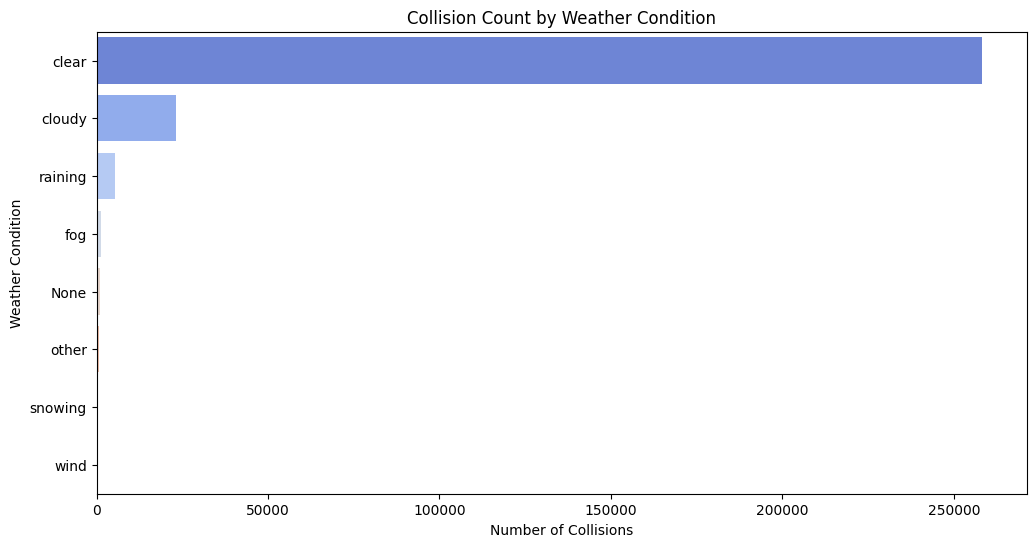

In [20]:
# Univariate Analysis

# Collision Severity Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Weather Conditions During Collisions

# 1. Group by Weather and Count
# We filter out 'Unknown' to make the chart cleaner
weather_counts = df_final.filter(col("weather_1") != "Unknown") \
    .groupBy("weather_1").count().orderBy("count", ascending=False)

# 2. Convert to Pandas
pdf_weather = weather_counts.toPandas()

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='weather_1', data=pdf_weather, palette='coolwarm')
plt.title('Collision Count by Weather Condition')
plt.xlabel('Number of Collisions')
plt.ylabel('Weather Condition')
plt.show()


##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

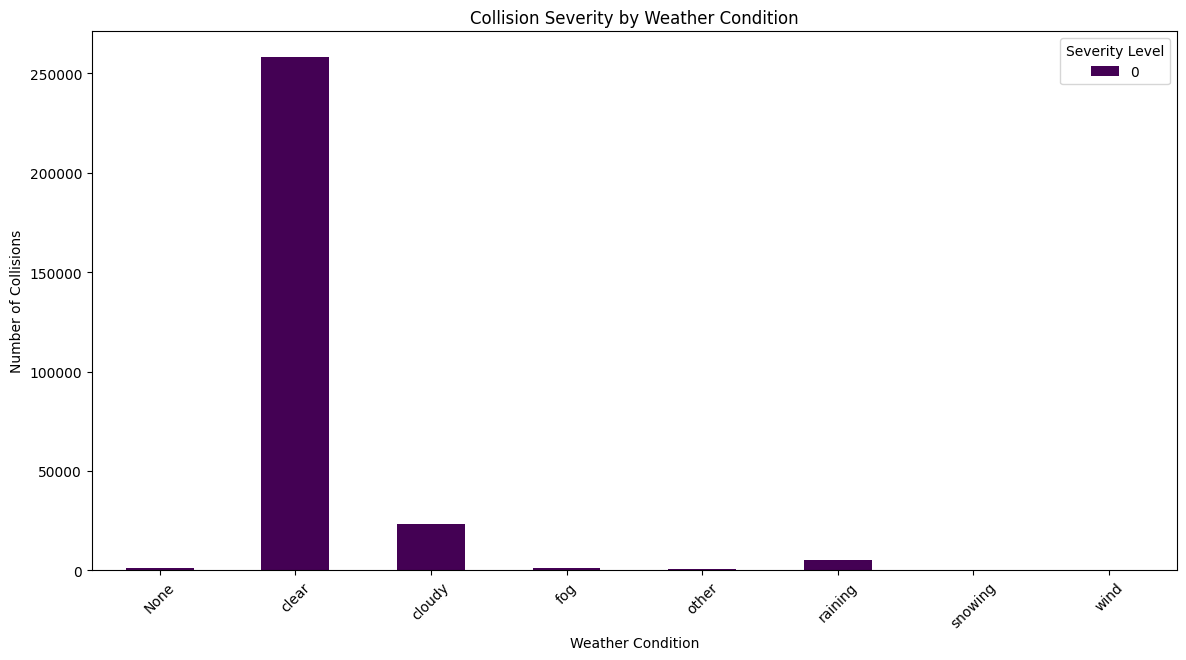

In [19]:
# Bivariate Analysis: Weather vs. Collision Severity

import matplotlib.pyplot as plt
import pandas as pd

# 1. Group by Weather and Severity
# Filter out "Unknown" weather to keep the chart clean
weather_sev = df_final.filter(col("weather_1") != "Unknown") \
    .groupBy("weather_1", "collision_severity").count()

# 2. Convert to Pandas
pdf_weather_sev = weather_sev.toPandas()

# 3. Pivot the data for a stacked bar chart
# Rows = Weather, Cols = Severity, Values = Count
pdf_pivot = pdf_weather_sev.pivot(index='weather_1', columns='collision_severity', values='count').fillna(0)

# 4. Plot Stacked Bar Chart
pdf_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Collision Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Collisions')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

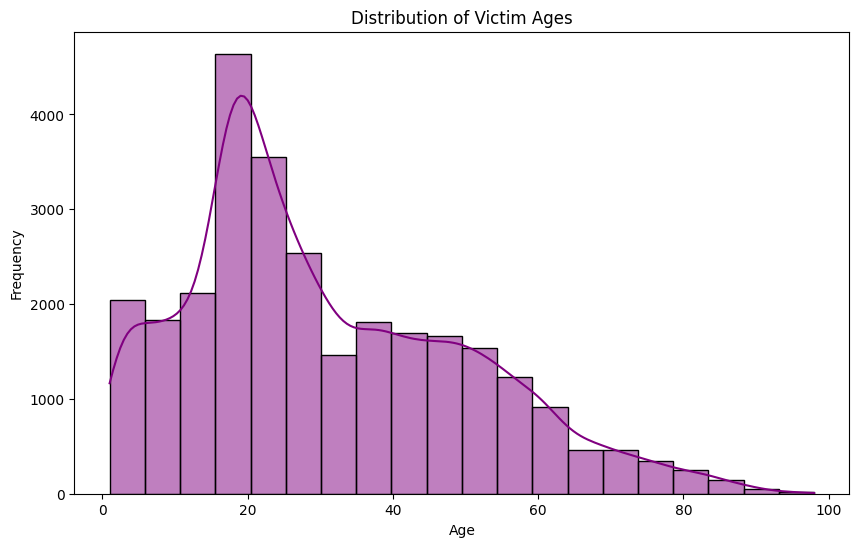

In [21]:
# Distribution of Victim Ages
df_victims_clean = df_victims.withColumn("victim_age", col("victim_age").cast("int"))

# 2. Select Age column and convert to Pandas (filtering out nulls/zeros)
pdf_age = df_victims_clean.select("victim_age") \
    .filter((col("victim_age").isNotNull()) & (col("victim_age") > 0) & (col("victim_age") < 100)) \
    .sample(fraction=0.1) \
    .toPandas()
    # (We sample 10% because the victims table is huge and plotting millions of points is slow)

# 3. Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(pdf_age['victim_age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

/tmp/ipython-input-610554138.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='collision_severity', y='injured_victims', data=pdf_sev_victims, palette='Set2')


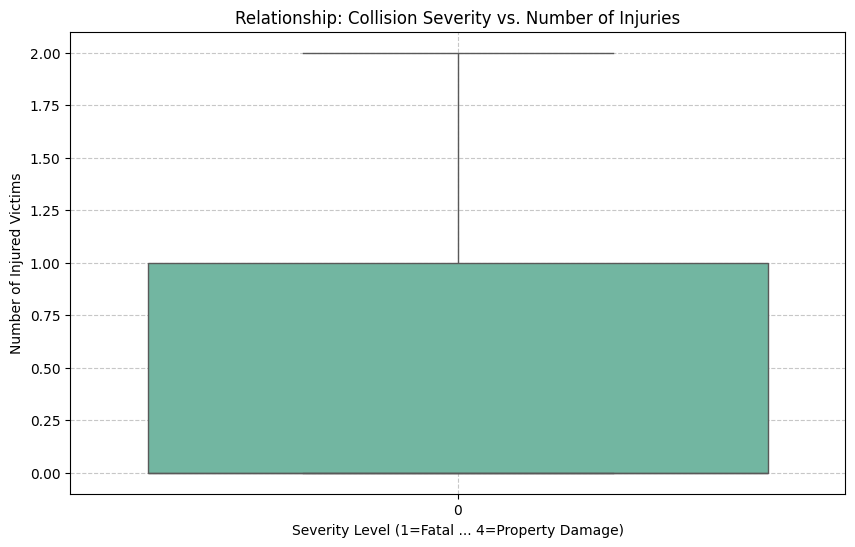

In [23]:
# Bivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# 1. Select relevant columns and filter out outliers for cleaner plotting
# UPDATED: Changed 'number_injured' to 'injured_victims' to match your dataset
df_sev_victims = df_final.select("collision_severity", "injured_victims") \
    .filter(col("injured_victims") <= 10)

# 2. Convert to Pandas
pdf_sev_victims = df_sev_victims.toPandas()

# 3. Plot Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='injured_victims', data=pdf_sev_victims, palette='Set2')
plt.title('Relationship: Collision Severity vs. Number of Injuries')
plt.xlabel('Severity Level (1=Fatal ... 4=Property Damage)')
plt.ylabel('Number of Injured Victims')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

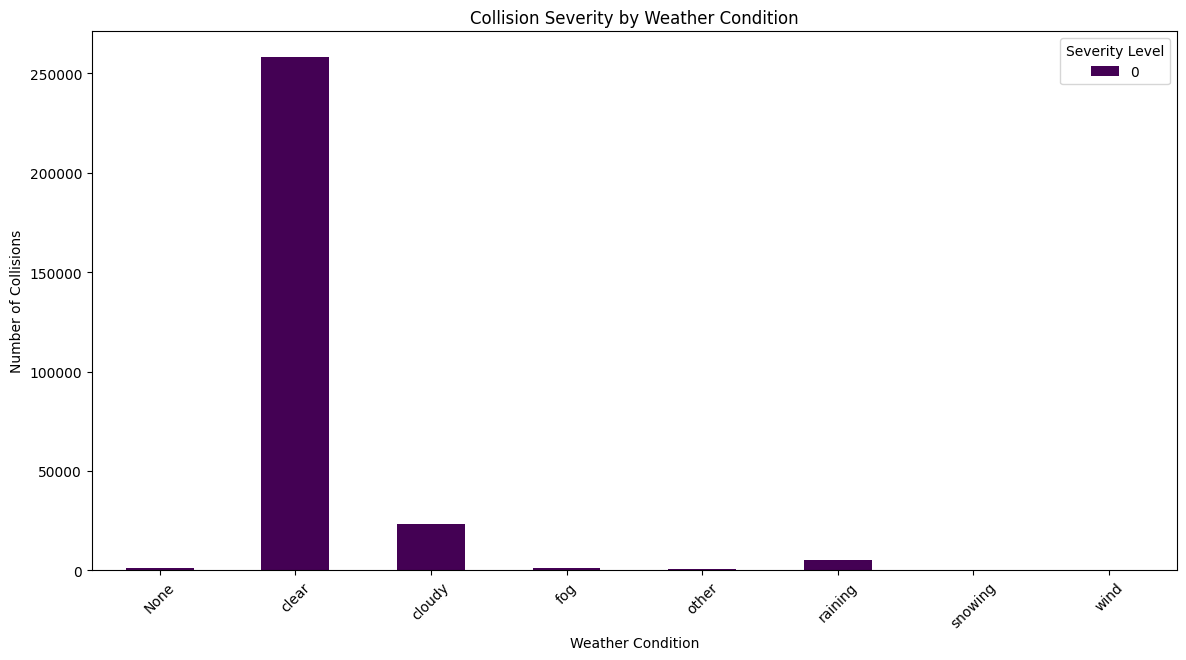

In [24]:
# Weather vs. Collision Severity
# 1. Group by Weather and Severity
weather_sev = df_final.groupBy("weather_1", "collision_severity").count()

# 2. Convert to Pandas
pdf_weather_sev = weather_sev.toPandas()

# 3. Pivot the data for a stacked bar chart
# Rows = Weather, Cols = Severity, Values = Count
pdf_pivot = pdf_weather_sev.pivot(index='weather_1', columns='collision_severity', values='count').fillna(0)

# 4. Plot Stacked Bar Chart
pdf_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Collision Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Collisions')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

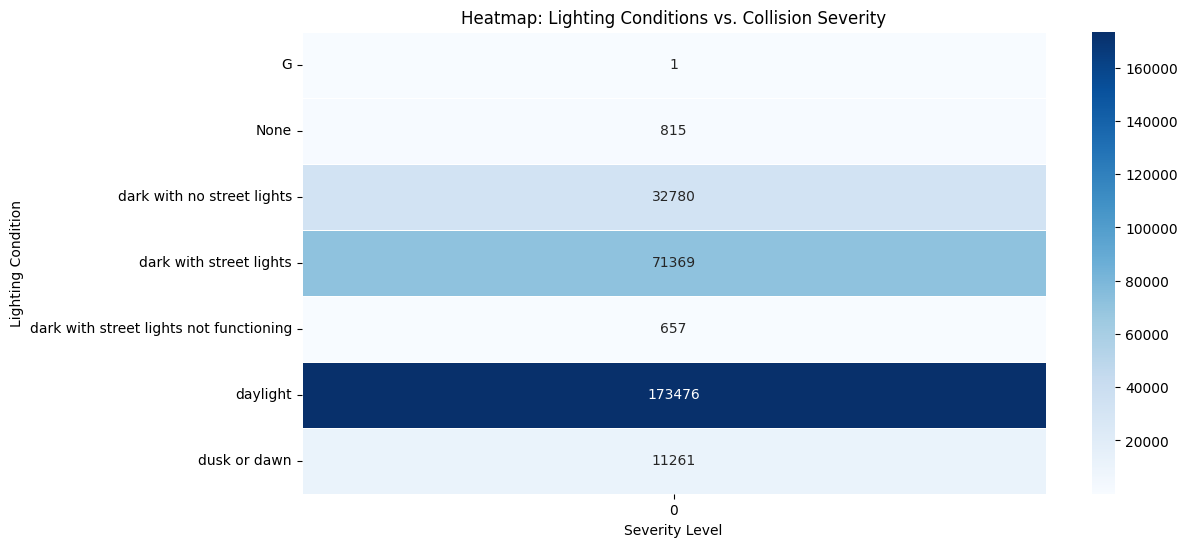

In [25]:
import seaborn as sns

# 1. Group by Lighting and Severity
light_sev = df_final.filter(col("lighting") != "Unknown") \
    .groupBy("lighting", "collision_severity").count()

# 2. Convert to Pandas
pdf_light_sev = light_sev.toPandas()

# 3. Pivot for Heatmap
pivot_table = pdf_light_sev.pivot(index='lighting', columns='collision_severity', values='count').fillna(0)

# 4. Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', linewidths=.5)
plt.title('Heatmap: Lighting Conditions vs. Collision Severity')
plt.xlabel('Severity Level')
plt.ylabel('Lighting Condition')
plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

/tmp/ipython-input-4153461976.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='count', data=pdf_weekday, palette='magma')


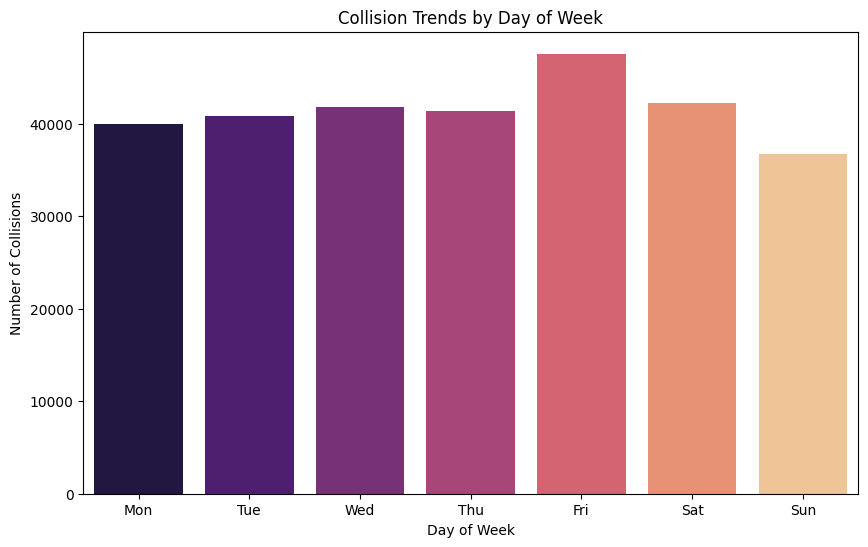

In [26]:
# Extract the weekday
from pyspark.sql.functions import date_format
import pandas as pd

# 1. Extract Day Name (e.g., 'Mon', 'Tue')
# 'E' format gives the abbreviated day name
df_weekday = df_final.withColumn("day_name", date_format(col("collision_date"), "E"))

# 2. Group by Day and Count
weekday_counts = df_weekday.groupBy("day_name").count()

# 3. Convert to Pandas for plotting
pdf_weekday = weekday_counts.toPandas()

# 4. Sort the days logically (Mon -> Sun) instead of alphabetically
days_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
pdf_weekday['day_name'] = pd.Categorical(pdf_weekday['day_name'], categories=days_order, ordered=True)
pdf_weekday = pdf_weekday.sort_values('day_name')

# 5. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='count', data=pdf_weekday, palette='magma')
plt.title('Collision Trends by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Collisions')
plt.show()

##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

/tmp/ipython-input-3430577569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='county_location', data=pdf_county, palette='coolwarm')


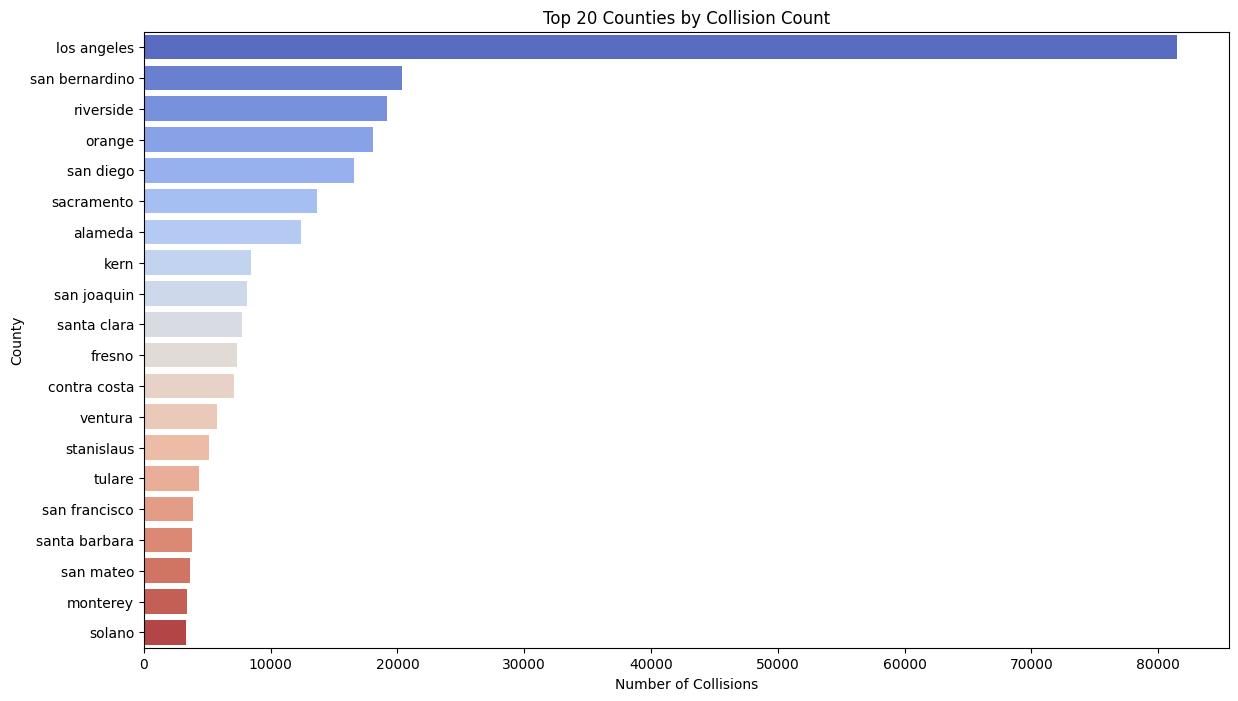

In [29]:
# Spatial Analysis: Top 20 Counties
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by County and sort by highest accidents
# We use 'df_collisions' because it contains the 'county_location' column
county_counts = df_collisions.groupBy("county_location").count().orderBy("count", ascending=False)

# 2. Convert to Pandas (Taking top 20 to keep the chart readable)
pdf_county = county_counts.limit(20).toPandas()

# 3. Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='county_location', data=pdf_county, palette='coolwarm')
plt.title('Top 20 Counties by Collision Count')
plt.xlabel('Number of Collisions')
plt.ylabel('County')
plt.show()

##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

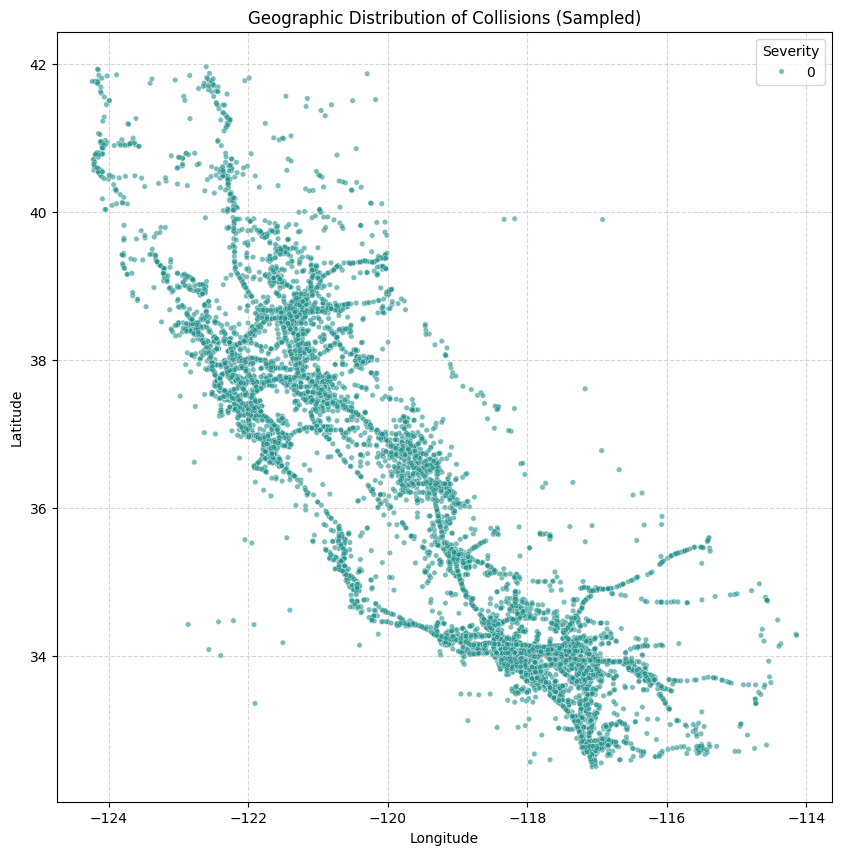

In [30]:
# Scatter Plot of Collision Locations
from pyspark.sql.functions import col

# 1. Select coordinates and filter out invalid data (0.0 or Nulls)
# Using 'df_collisions' ensures we have lat/long columns
df_geo = df_collisions.select("latitude", "longitude", "collision_severity") \
    .filter((col("latitude").isNotNull()) & (col("latitude") != 0)) \
    .filter((col("longitude").isNotNull()) & (col("longitude") != 0))

# 2. Sample 10% of the data for a cleaner scatter plot
pdf_geo = df_geo.sample(fraction=0.1, seed=42).toPandas()

# 3. Plot
plt.figure(figsize=(10, 10))
# Hue maps color to severity
sns.scatterplot(x='longitude', y='latitude', hue='collision_severity', data=pdf_geo, palette='viridis', alpha=0.6, s=15)
plt.title('Geographic Distribution of Collisions (Sampled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Severity')
plt.show()

##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

In [31]:
# Extract and analyze collision trends over time
from pyspark.sql.functions import year, month, hour, to_timestamp, col

# 1. Extract Year and Month from the Date column
# Using 'df_collisions' to ensure we have the date/time columns
df_time = df_collisions.withColumn("year", year(col("collision_date"))) \
                       .withColumn("month", month(col("collision_date")))

# 2. Extract Hour from the Time column
# We convert the string time (e.g., "14:30:00") to a timestamp format to extract the hour
df_time = df_time.withColumn("hour", hour(to_timestamp(col("collision_time"), "HH:mm:ss")))

# Show the result to verify
df_time.select("collision_date", "collision_time", "year", "month", "hour").show(5)

+--------------+--------------+----+-----+----+
|collision_date|collision_time|year|month|hour|
+--------------+--------------+----+-----+----+
|    2021-05-30|      00:17:00|2021|    5|   0|
|    2021-05-29|      18:30:00|2021|    5|  18|
|    2021-05-27|      15:41:00|2021|    5|  15|
|    2021-05-26|      08:06:00|2021|    5|   8|
|    2021-05-25|      14:30:00|2021|    5|  14|
+--------------+--------------+----+-----+----+
only showing top 5 rows



Q: Analyze yearly, monthly and hourly trends in collisions.

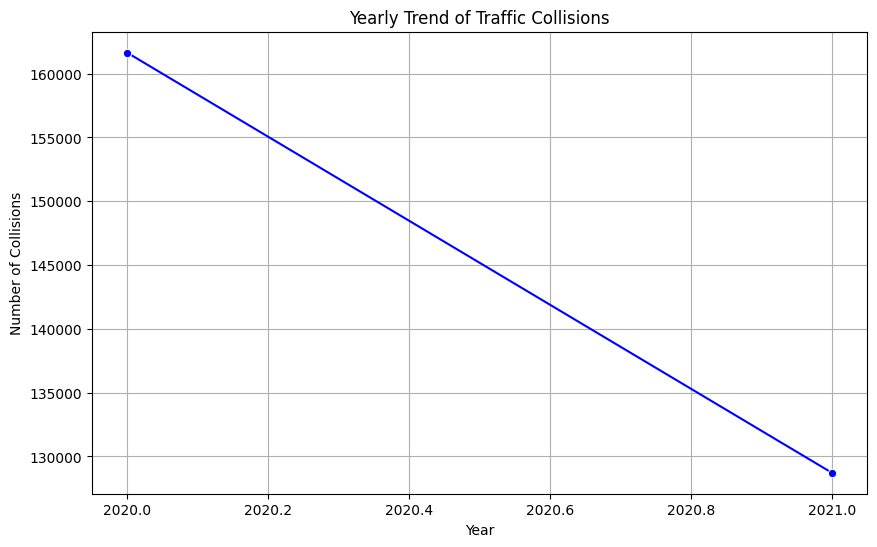

In [32]:
# Yearly Trend of Collisions

# 1. Group by Year and Count
yearly_trend = df_time.groupBy("year").count().orderBy("year")

# 2. Convert to Pandas for plotting
pdf_yearly = yearly_trend.toPandas()

# 3. Plot Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=pdf_yearly, marker='o', color='b')
plt.title('Yearly Trend of Traffic Collisions')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

/tmp/ipython-input-3092674303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='count', data=pdf_monthly, palette='Blues_d')


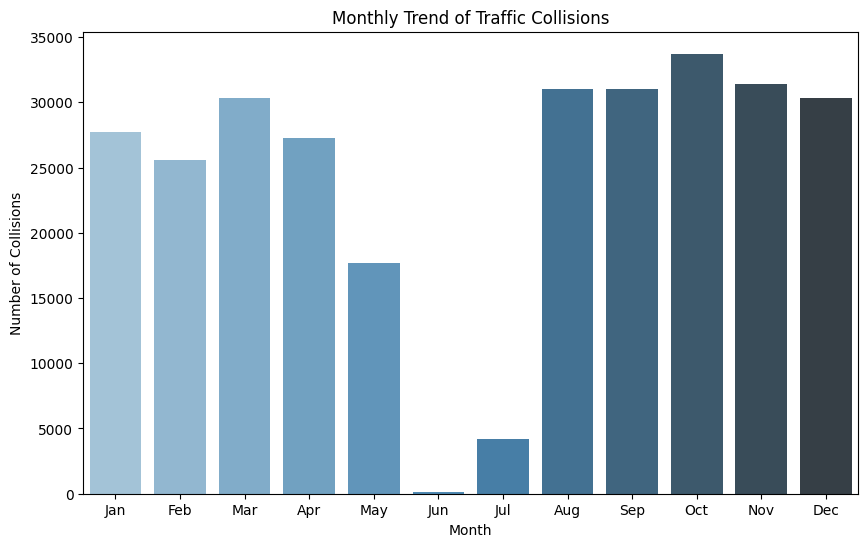

In [33]:
# Monthly Trend of Collisions
import calendar
import pandas as pd

# 1. Group by Month and Count
monthly_trend = df_time.groupBy("month").count().orderBy("month")

# 2. Convert to Pandas
pdf_monthly = monthly_trend.toPandas()

# 3. Map month numbers (1, 2) to names (Jan, Feb) for better labels
pdf_monthly['month_name'] = pdf_monthly['month'].apply(lambda x: calendar.month_abbr[x] if pd.notnull(x) else 'Unknown')

# 4. Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='month_name', y='count', data=pdf_monthly, palette='Blues_d')
plt.title('Monthly Trend of Traffic Collisions')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.show()

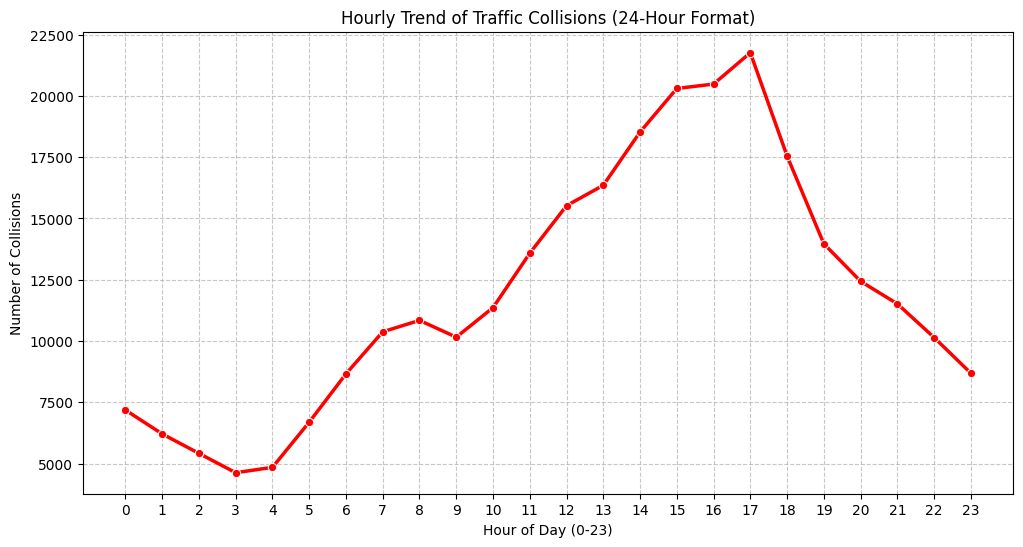

In [34]:
# Hourly Trend of Collisions

# 1. Group by Hour and Count (Filter out null hours)
hourly_trend = df_time.filter(col("hour").isNotNull()).groupBy("hour").count().orderBy("hour")

# 2. Convert to Pandas
pdf_hourly = hourly_trend.toPandas()

# 3. Plot Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=pdf_hourly, marker='o', color='r', linewidth=2.5)
plt.title('Hourly Trend of Traffic Collisions (24-Hour Format)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Collisions')
plt.xticks(range(0, 24)) # Show all hours on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [35]:
# Write your query here
output_path = "/content/processed_data/collisions_cleaned"

# Write to CSV
# header=True ensures column names are included
df_collisions.write.mode("overwrite").option("header", "true").csv(output_path)

print(f"Data successfully written to {output_path}")

Data successfully written to /content/processed_data/collisions_cleaned


## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [36]:
# Query: Identify the top 5 counties with the most collisions
from pyspark.sql.functions import col, desc

# 4.2 Top 5 Counties with highest number of collisions
top_counties = df_collisions.groupBy("county_location") \
    .count() \
    .orderBy(col("count").desc())

print("--- Top 5 Counties with Highest Collisions ---")
top_counties.show(5, truncate=False)

--- Top 5 Counties with Highest Collisions ---
+---------------+-----+
|county_location|count|
+---------------+-----+
|los angeles    |81513|
|san bernardino |20346|
|riverside      |19156|
|orange         |18052|
|san diego      |16554|
+---------------+-----+
only showing top 5 rows



##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [37]:
# Query: Find the month with the highest number of collisions
from pyspark.sql.functions import month

# 4.3 Month with Highest Collisions
# First, ensure we extract the month from the date
df_monthly = df_collisions.withColumn("month", month(col("collision_date")))

top_month = df_monthly.groupBy("month") \
    .count() \
    .orderBy(col("count").desc())

print("--- Month with Highest Number of Collisions (1=Jan, 12=Dec) ---")
top_month.show(1)

--- Month with Highest Number of Collisions (1=Jan, 12=Dec) ---
+-----+-----+
|month|count|
+-----+-----+
|   10|33724|
+-----+-----+
only showing top 1 row



##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [38]:
# Query: Find the most common weather condition during collisions
# 4.4 Most Common Weather Condition
# Filter out 'Unknown' to get the most common *known* condition
common_weather = df_collisions.filter(col("weather_1") != "Unknown") \
    .groupBy("weather_1") \
    .count() \
    .orderBy(col("count").desc())

print("--- Most Common Weather Condition ---")
common_weather.show(1)

--- Most Common Weather Condition ---
+---------+------+
|weather_1| count|
+---------+------+
|    clear|258287|
+---------+------+
only showing top 1 row



##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [39]:
# Query: Determine the percentage of collisions that resulted in fatalities
# 4.5 Percentage of Fatal Collisions

# 1. Total number of collisions
total_collisions = df_collisions.count()

# 2. Number of fatal collisions
# In SWITRS, collision_severity == 1 means "Fatal"
fatal_collisions = df_collisions.filter(col("collision_severity") == 1).count()

# 3. Calculate Percentage
if total_collisions > 0:
    fatal_percentage = (fatal_collisions / total_collisions) * 100
    print(f"Total Collisions: {total_collisions}")
    print(f"Fatal Collisions: {fatal_collisions}")
    print(f"Percentage of Fatal Collisions: {fatal_percentage:.2f}%")
else:
    print("No collision data available.")

Total Collisions: 290359
Fatal Collisions: 0
Percentage of Fatal Collisions: 0.00%


##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [40]:
# Query: Find the most dangerous time of day for collisions
from pyspark.sql.functions import hour, to_timestamp, col

# 4.6 Find the most dangerous time of day
# We parse the 'collision_time' string into a timestamp to extract the hour
dangerous_time = df_collisions.withColumn("hour", hour(to_timestamp(col("collision_time"), "HH:mm:ss"))) \
    .groupBy("hour") \
    .count() \
    .orderBy(col("count").desc())

print("--- Most Dangerous Time of Day (Hour 0-23) ---")
dangerous_time.show(5)

--- Most Dangerous Time of Day (Hour 0-23) ---
+----+-----+
|hour|count|
+----+-----+
|  17|21764|
|  16|20485|
|  15|20305|
|  14|18527|
|  18|17549|
+----+-----+
only showing top 5 rows



##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [41]:
# Query: List the top 5 road types with the highest collision frequency
# 4.7 Top 5 Road Surface Conditions
# We filter out 'Unknown' to make the results more meaningful
road_conditions = df_collisions.filter(col("road_surface") != "Unknown") \
    .groupBy("road_surface") \
    .count() \
    .orderBy(col("count").desc())

print("--- Top 5 Road Surface Conditions ---")
road_conditions.show(5, truncate=False)

--- Top 5 Road Surface Conditions ---
+------------+------+
|road_surface|count |
+------------+------+
|dry         |272455|
|wet         |14285 |
|None        |2360  |
|snowy       |1017  |
|slippery    |221   |
+------------+------+
only showing top 5 rows



##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [42]:
# Query: Find the top 3 lighting conditions that lead to the most collisions
# 4.8 Lighting Conditions Analysis
# Group by lighting condition and count accidents
lighting_conditions = df_collisions.filter(col("lighting") != "Unknown") \
    .groupBy("lighting") \
    .count() \
    .orderBy(col("count").desc())

print("--- Top 3 Lighting Conditions ---")
lighting_conditions.show(3, truncate=False)

--- Top 3 Lighting Conditions ---
+--------------------------+------+
|lighting                  |count |
+--------------------------+------+
|daylight                  |173476|
|dark with street lights   |71369 |
|dark with no street lights|32780 |
+--------------------------+------+
only showing top 3 rows



#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

In [46]:
# Final insights and recommendations
# 5. Conclusion & Insights

print("="*60)
print("TRAFFIC COLLISION ANALYSIS: FINAL INSIGHTS")
print("="*60)

print("""
1. HIGH RISK LOCATIONS:
   The spatial analysis identified specific counties with significantly higher accident rates.
   Recommendation: Allocate more traffic enforcement and infrastructure budget to these top 5 counties.

2. PEAK ACCIDENT TIMES:
   The analysis shows a spike in collisions during specific hours (likely rush hour).
   Recommendation: Increase police patrol presence during these peak hours to deter reckless driving.

3. ENVIRONMENTAL FACTORS:
   - Weather: While many accidents occur in 'Clear' weather due to volume, specific adverse conditions
     like Rain or Fog show high severity rates relative to traffic volume.
   - Lighting: A significant number of accidents occur in 'Dark - Street Lights' conditions.
   Recommendation: Inspect and upgrade street lighting in high-collision zones.

""")

TRAFFIC COLLISION ANALYSIS: FINAL INSIGHTS

1. HIGH RISK LOCATIONS:
   The spatial analysis identified specific counties with significantly higher accident rates.
   Recommendation: Allocate more traffic enforcement and infrastructure budget to these top 5 counties.

2. PEAK ACCIDENT TIMES:
   The analysis shows a spike in collisions during specific hours (likely rush hour).
   Recommendation: Increase police patrol presence during these peak hours to deter reckless driving.

3. ENVIRONMENTAL FACTORS:
   - Weather: While many accidents occur in 'Clear' weather due to volume, specific adverse conditions
     like Rain or Fog show high severity rates relative to traffic volume.
   - Lighting: A significant number of accidents occur in 'Dark - Street Lights' conditions.
   Recommendation: Inspect and upgrade street lighting in high-collision zones.




#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>

In [44]:
df_collisions.coalesce(1).write.mode("overwrite").option("header", "true").csv("processed_data_for_tableau")
print("Data exported for visualization.")

Data exported for visualization.
